<a href="https://colab.research.google.com/github/Jinyu-Luo/CHL5230-Datathon5/blob/main/11_CHL5230_F23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Dataton 5**

In [1]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.8 MB/s eta 0:00:00


In [2]:
# Import libraries
from google.colab import files
import os
import io
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay, accuracy_score, auc
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.impute import SimpleImputer
import warnings
from sklearn.datasets import load_iris
from sklearn.naive_bayes import CategoricalNB, GaussianNB, MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.pipeline import Pipeline

!pip install category_encoders
from category_encoders import OneHotEncoder, TargetEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils.class_weight import compute_class_weight
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Dropout

warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.6 MB/s eta 0:00:00


In [3]:
#Import data
imported=files.upload()

Saving mhealth.csv to mhealth.csv


In [16]:
df= pd.read_csv('mhealth.csv')
df.head(10)

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,0,subject1
5,2.2639,-9.4493,0.61267,0.098330,-0.84240,-0.68959,-8.7247,-4.0449,0.506090,-0.45686,-1.0082,0.025862,0,subject1
6,2.1740,-9.6574,0.60137,0.098330,-0.84240,-0.68959,-9.0864,-4.1474,0.261380,-0.42745,-1.0164,0.019397,0,subject1
7,2.2023,-9.4397,0.58129,0.098330,-0.84240,-0.68959,-9.0143,-4.0052,0.476820,-0.42745,-1.0164,0.019397,0,subject1
8,2.2037,-9.6283,0.54062,0.076067,-0.83114,-0.69155,-9.0469,-4.0475,0.245540,-0.42745,-1.0164,0.019397,0,subject1
9,2.2135,-9.6887,0.43353,0.076067,-0.83114,-0.69155,-8.8318,-4.1090,0.096632,-0.42745,-1.0164,0.019397,0,subject1


# EDA

In [ ]:
#Missing values
print(df.isnull().sum())

#Columns missing over 50%
missing_threshold = 0.5 * len(df)
columns_to_drop = df.columns[df.isnull().sum() > missing_threshold]
print(columns_to_drop)

alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64
Index([], dtype='object')


In [ ]:
#Descriptive statstics
print(df.describe())

#Counts
counts = ['Activity','subject']
for column in counts:
  print(df[column].value_counts())

                 alx            aly            alz            glx  \
count  999999.000000  999999.000000  999999.000000  999999.000000   
mean        1.473954      -9.618162      -0.944714      -0.023928   
std         3.751845       4.076683       5.333969       0.495758   
min       -22.146000     -19.619000     -19.373000      -2.146600   
25%         0.115100     -10.116000      -2.662400      -0.454550   
50%         1.336800      -9.644800      -0.016372      -0.070501   
75%         2.586900      -9.034300       1.371500       0.426720   
max        20.054000      21.161000      25.015000      60.484000   

                 gly            glz            arx           ary  \
count  999999.000000  999999.000000  999999.000000  999999.00000   
mean       -0.616830      -0.131466      -3.578801      -5.72591   
std         0.354135       0.547774       4.770602       5.70559   
min        -7.789900      -2.567800     -22.361000     -18.97200   
25%        -0.816140      -0.561890   

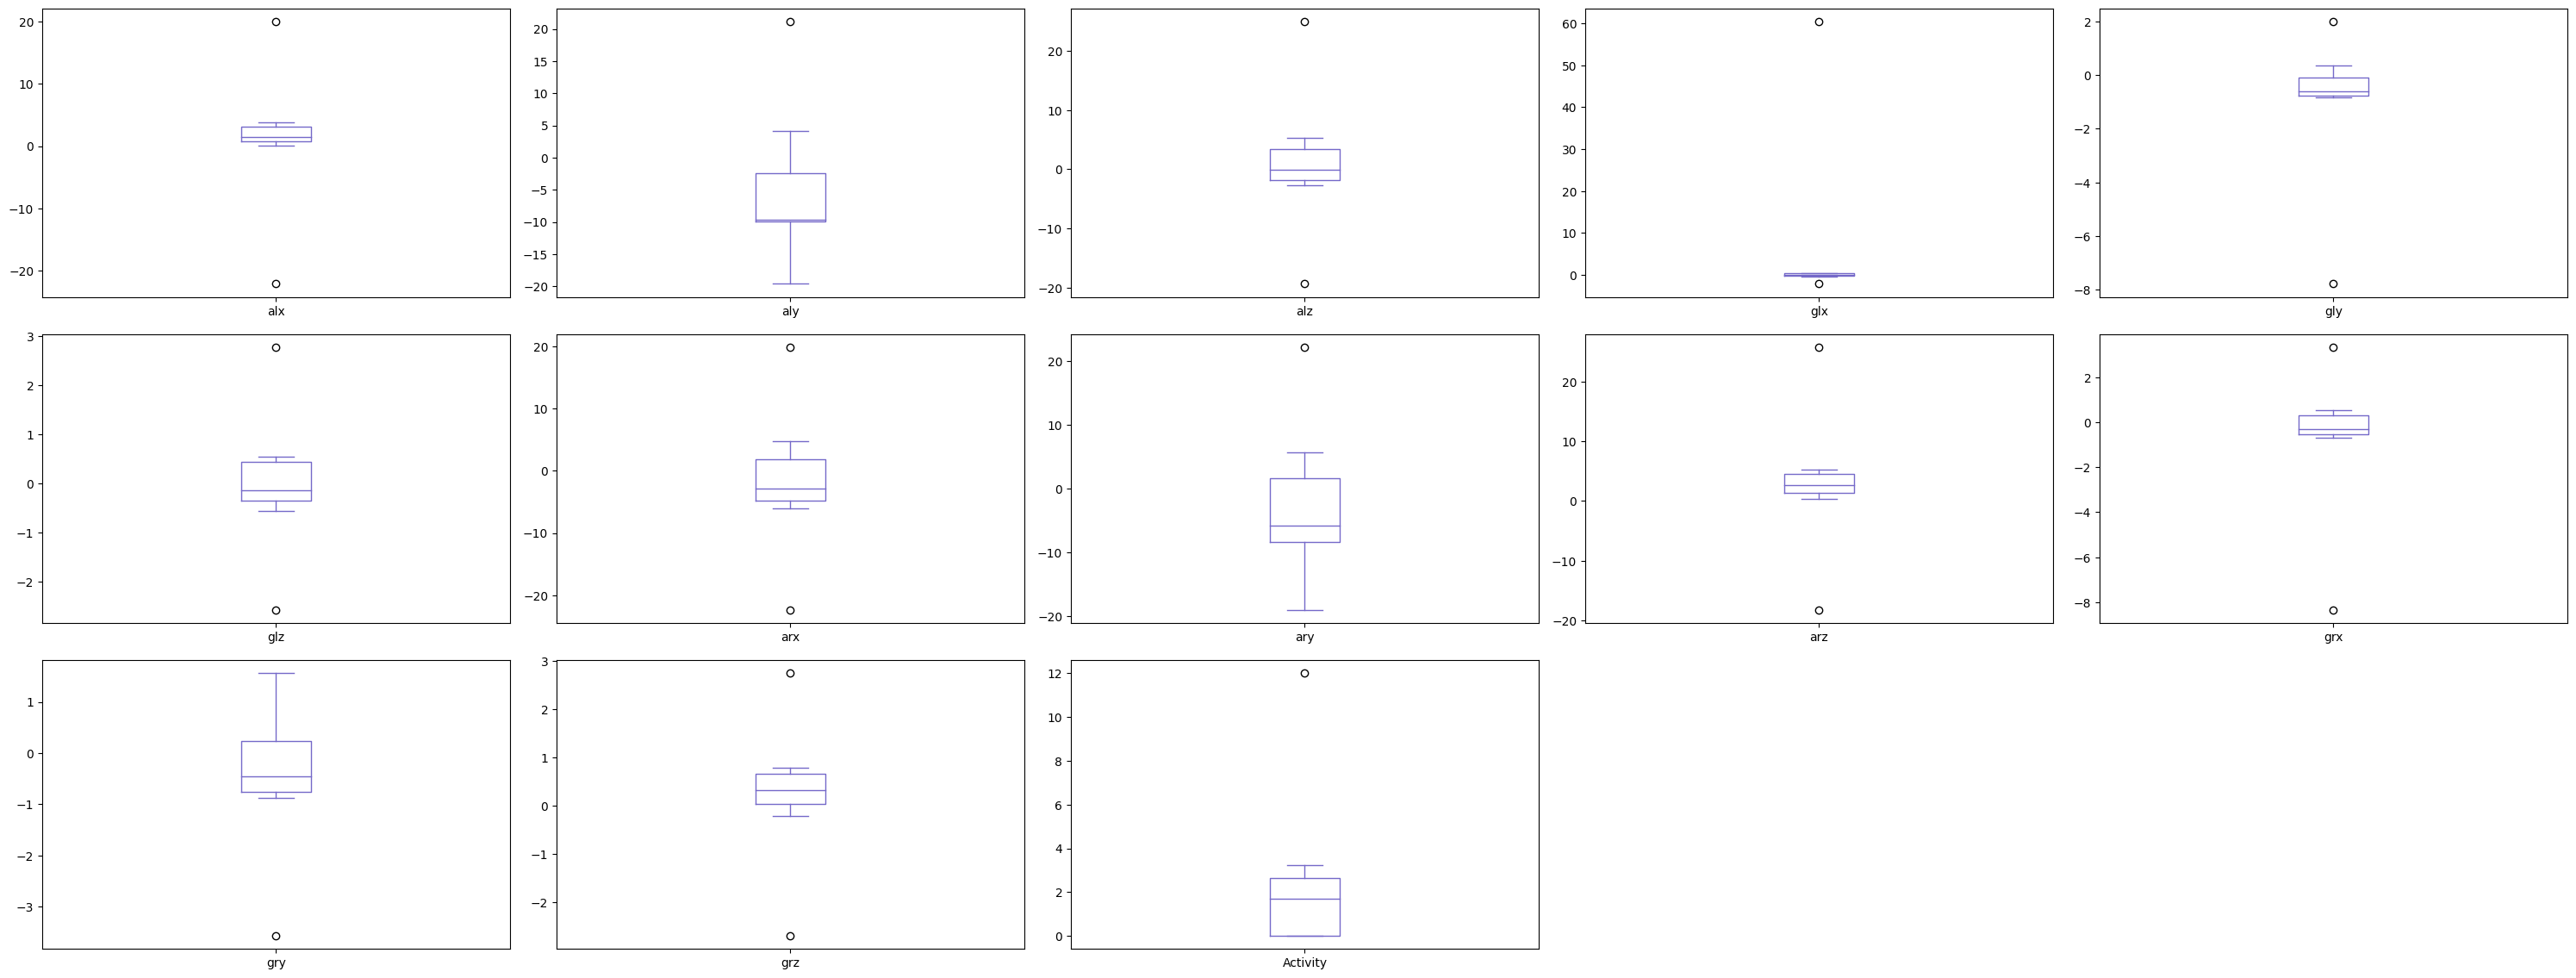

In [ ]:
#Box plot visualisation
description=df.describe()

description = description.drop('count')
description.plot(kind='box', subplots=True, layout=(4, 5), figsize=(30, 15), color='#7569c9')
plt.tight_layout()
plt.show()

In [ ]:
#Group all sedentary activities into one category
# df['Activity'] = df['Activity'].replace([0, 1, 2, 3], 13)

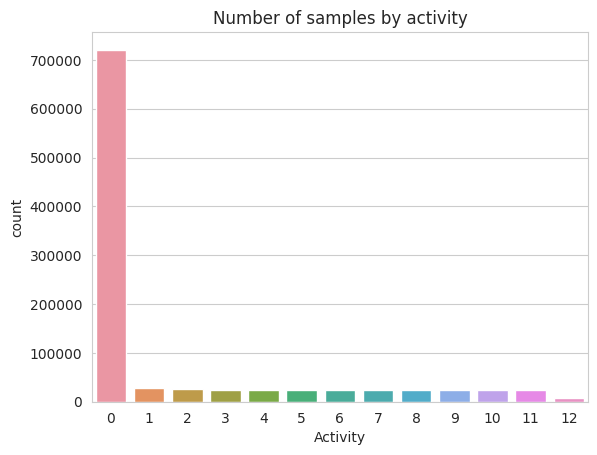

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x = 'Activity', data = df)
plt.title('Number of samples by activity')
plt.show()

The distribution of activities is quite imbalanced, with the majority of the data points representing 'No activity' (activity level 0). Now, let's see how the individual volunteers are contributing to each activity.

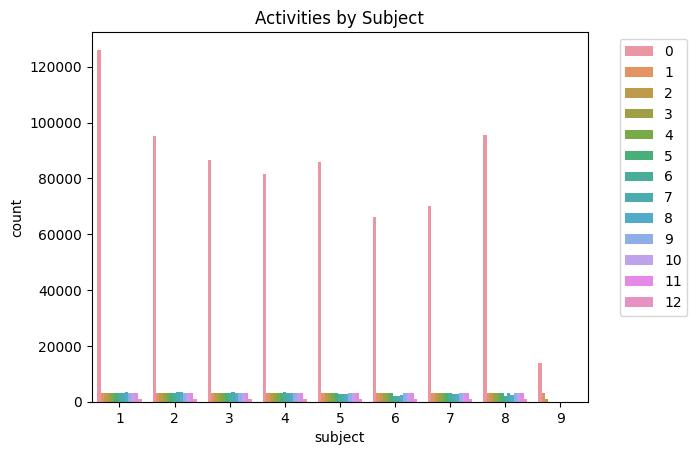

In [27]:
# Removing the "subject" part from each value in the subject column
def extract_number(string):
    return string.replace("subject", "")

df['subject'] = df['subject'].apply(extract_number)

sns.countplot(x = 'subject',  hue = 'Activity', data = df)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Activities by Subject')
plt.show()

In [ ]:
#Counts
counts = ['Activity']
for column in counts:
  print(df[column].value_counts())

13    798576
4      24576
9      24576
10     24576
11     24576
5      24576
7      23809
8      23501
6      22990
12      8243
Name: Activity, dtype: int64


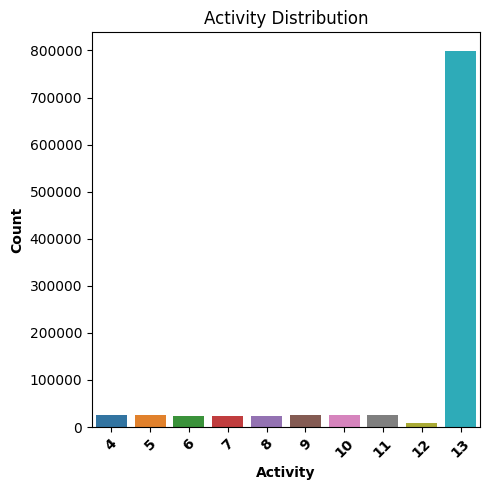

In [ ]:
# Activity Distribution
plt.figure(figsize=(5, 5))
sns.countplot(x='Activity', data=df)
plt.title('Activity Distribution')
plt.xlabel('Activity', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xticks(rotation=45, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

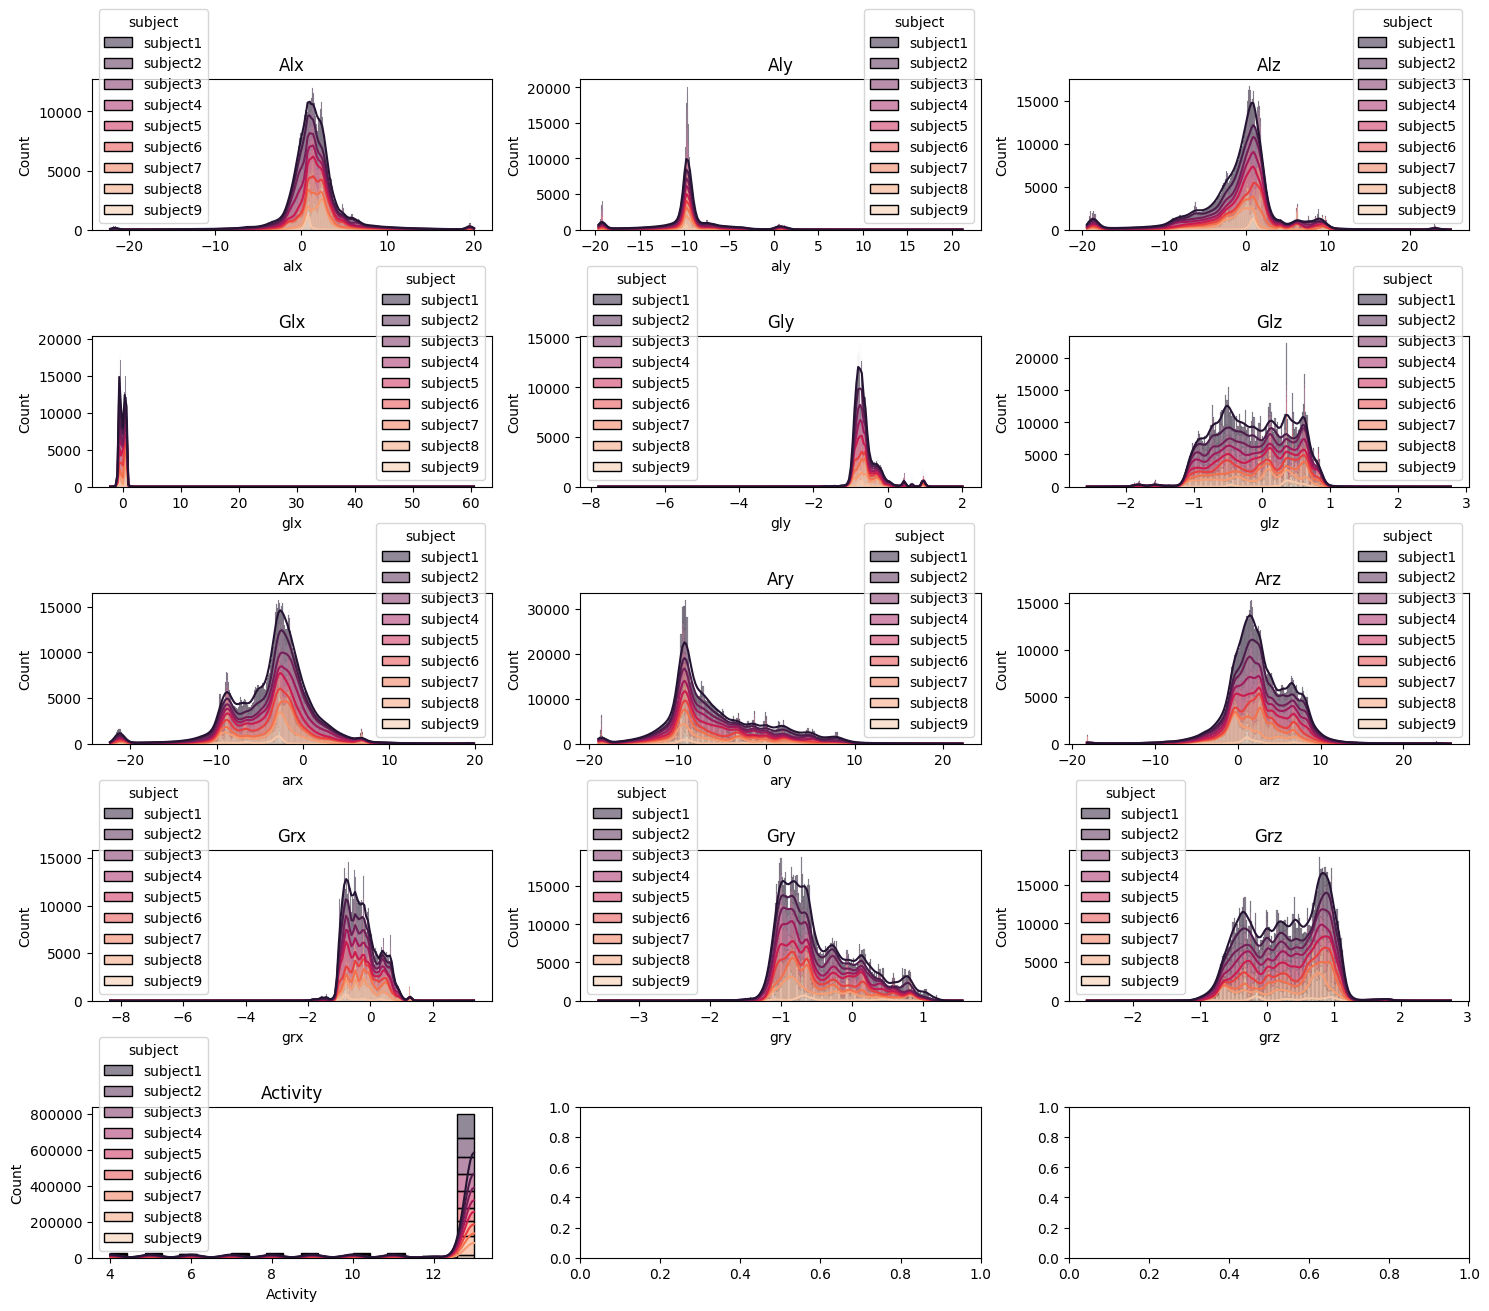

In [ ]:
#Distribution by subject
columns_for_analysis1 = [
    'alx','aly', 'alz',
    'glx',	'gly',	'glz',
    'arx',	'ary',	'arz',
    'grx',	'gry',	'grz',
    'Activity'
]
# Create a grid of subplots with 3 rows and 3 columns
fig, axs = plt.subplots(ncols=3, nrows=5, figsize=(15, 13))

# Loop over each selected feature to create a subplot for each
for i, column in enumerate(columns_for_analysis1):
    # Calculate the position for the subplot; x is the row index and y is the column index
    x = i // 3
    y = i % 3

    # Plot a histogram of the feature split by the 'subject'
    sns.histplot(df, x=column, hue='subject', kde=True, palette='rocket', ax=axs[x][y],
                 multiple='stack')
    axs[x][y].set_title(column.replace('_', ' ').title())

# Adjust the layout and display all the subplots
plt.tight_layout()
plt.show()

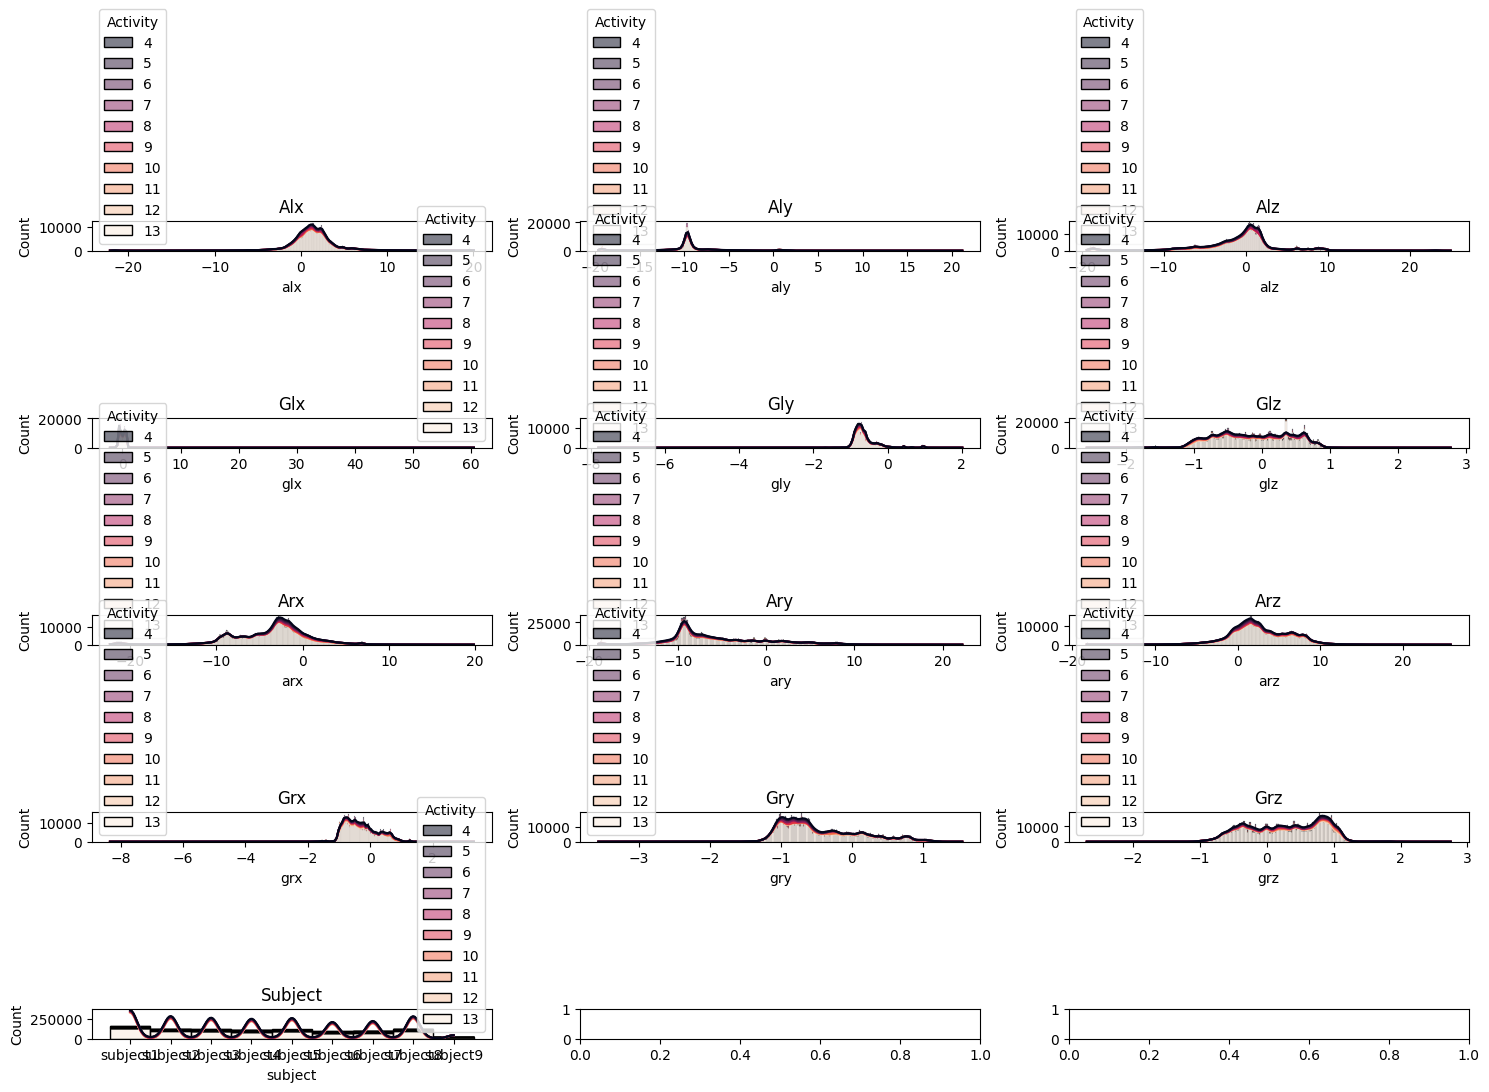

In [ ]:
# Distibution by activity
columns_for_analysis2 = [
    'alx','aly', 'alz',
    'glx',	'gly',	'glz',
    'arx',	'ary',	'arz',
    'grx',	'gry',	'grz',
    'subject'
]

# Create a grid of subplots with 2 rows and 3 columns
fig, axs = plt.subplots(ncols=3, nrows=5, figsize=(15, 10))

# Loop over each feature in numerical and multinomial lists
for i, column in enumerate(columns_for_analysis2):
    # Calculate the position for the subplot; x is the row index and y is the column index
    x = i // 3
    y = i % 3

    # Plot a histogram of the feature split by the 'activity'
    sns.histplot(df, x=column, hue='Activity', kde=True, palette='rocket', ax=axs[x][y],
                 multiple='stack')
    axs[x][y].set_title(column.replace('_', ' ').title())

# Adjust the layout and display all the subplots
plt.tight_layout()
plt.show()

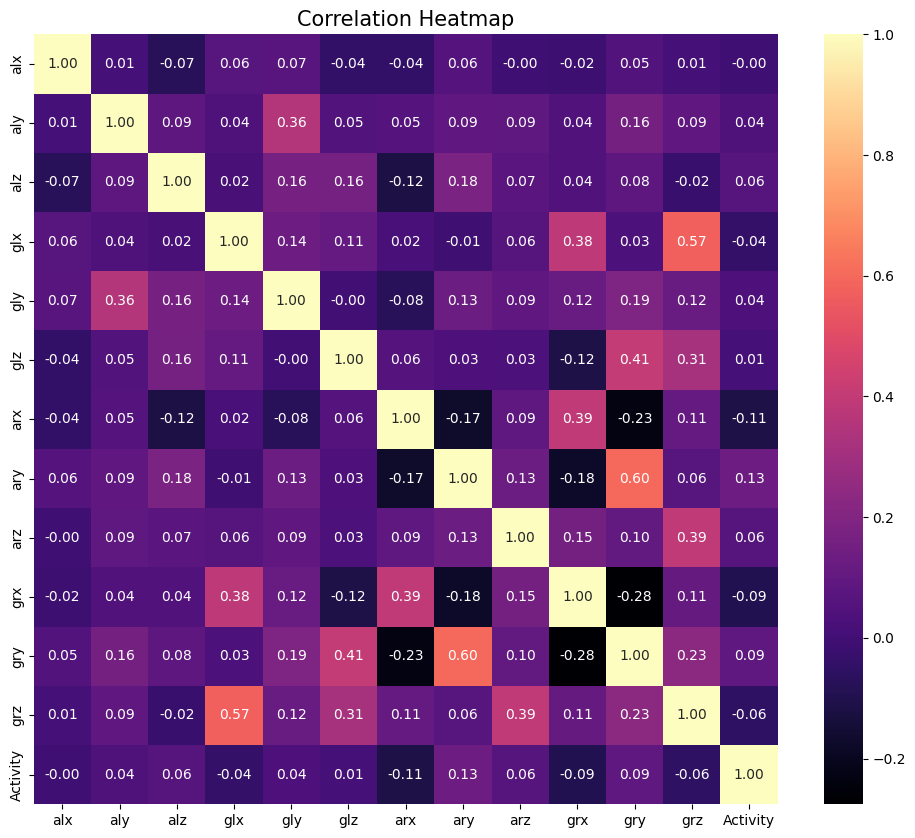

In [ ]:
#Correlation heatmap

correlation_matrix = df[columns_for_analysis1].corr()

# Plot the updated correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='magma')
plt.title('Correlation Heatmap', fontsize=15)
plt.show()


## Data Preprocessing

The dataset consists of nearly one million entries and 14 columns.

- `alx`, `aly`, `alz`: Accelerometer data from the left ankle (x, y, and z axes).  
- `glx`, `gly`, `glz`: Gyroscope data from the left ankle (x, y, and z axes).  
- `arx`, `ary`, `arz`: Accelerometer data from the right arm (x, y, and z axes).  
- `grx`, `gry`, `grz`: Gyroscope data from the right arm (x, y, and z axes).  
- `Activity`: Categorical variable indicating the activity level, ranging from 0 (no activity) to 12.  
- `subject`: Identifier for the subject wearing the sensors.

Let's proceed with the following steps:

1. **Normalization**: We'll normalize the accelerometer and gyroscope data using Min-Max scaling so that the measurements will lie between of 0 and 1.  
2. **Segmentation and Reshaping**: Segment the data using a window size of 2.56 seconds. We'll determine the number of data points per window based on the sampling frequency, which we need to identify from the data. Then, reshape the data for LSTM input.   
3. **Data Splitting**: Split the data into training and testing sets (80% training, 20% testing).  

In [17]:
# ================ Step1: Normalization =====================#
# Columns to be normalized (all sensor data)
sensor_columns = ['alx', 'aly', 'alz', 'glx', 'gly', 'glz',
                  'arx', 'ary', 'arz', 'grx', 'gry', 'grz']

# Initialize Min-Max Scaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform it
df[sensor_columns] = scaler.fit_transform(df[sensor_columns])

# Check the first few rows to confirm normalization
df.head()

# ============= Step2: Segmentation and Reshape ==============#
def create_segments(df, window_size, step_size):
    segments = []
    labels = []
    for i in range(0, len(df) - window_size, step_size):
        alx = df['alx'].values[i: i + window_size]
        aly = df['aly'].values[i: i + window_size]
        alz = df['alz'].values[i: i + window_size]
        glx = df['glx'].values[i: i + window_size]
        gly = df['gly'].values[i: i + window_size]
        glz = df['glz'].values[i: i + window_size]
        arx = df['arx'].values[i: i + window_size]
        ary = df['ary'].values[i: i + window_size]
        arz = df['arz'].values[i: i + window_size]
        grx = df['grx'].values[i: i + window_size]
        gry = df['gry'].values[i: i + window_size]
        grz = df['grz'].values[i: i + window_size]

        # Retrieve the most frequently occurring label in this window
        label =  pd.Series(df['Activity'].values[i: i + window_size]).mode()[0]
        segments.append([alx, aly, alz, glx, gly, glz,
                         arx, ary, arz, grx, gry, grz])  # Add other sensor data
        labels.append(label)

    # Reshape the segments into a format acceptable for LSTM
    n_features = len(sensor_columns)
    segments = np.asarray(segments, dtype= np.float32).reshape(-1, window_size, n_features)
    labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)

    return segments, labels

# Define window and step sizes
window_size = 80
step_size = 40
# Apply the create_segments function to create segments
segments, labels = create_segments(df, window_size, step_size)

# Modelling

### Define Hyperparameters

In [18]:
seed = 42 # random seed to ensure reproducibility
n_epochs = 100
batch_size = 32
learning_rate = 0.0025
l2_loss = 0.0015

### Build and Compile the 1st LSTM

In [19]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(segments, labels,
                                                    test_size = 0.2,
                                                    random_state = seed)
model = Sequential()
# RNN layer
model.add(LSTM(units = 128, input_shape = (X_train.shape[1], X_train.shape[2])))
# Dropout layer
model.add(Dropout(0.5))
# Dense layer with ReLu
model.add(Dense(units = 64, activation='relu'))
# Softmax layer
model.add(Dense(y_train.shape[1], activation = 'softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 128)               72192     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 13)                845       
                                                                 
Total params: 81293 (317.55 KB)
Trainable params: 81293 (317.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Model Training

In [20]:
from keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train, y_train, epochs = n_epochs,
                    validation_split = 0.20,
                    batch_size = batch_size, verbose = 1,
                    callbacks=[early_stopping])

Epoch 1/100
500/500 [==============================] - 121s 120ms/step - loss: 1.3265 - accuracy: 0.7168 - val_loss: 1.2683 - val_accuracy: 0.7228
Epoch 2/100
500/500 [==============================] - 60s 119ms/step - loss: 1.2750 - accuracy: 0.7202 - val_loss: 1.1558 - val_accuracy: 0.7333
Epoch 3/100
500/500 [==============================] - 59s 118ms/step - loss: 1.2151 - accuracy: 0.7212 - val_loss: 1.1678 - val_accuracy: 0.7225
Epoch 4/100
500/500 [==============================] - 59s 118ms/step - loss: 1.2094 - accuracy: 0.7260 - val_loss: 1.2124 - val_accuracy: 0.7228
Epoch 5/100
500/500 [==============================] - 58s 116ms/step - loss: 1.1435 - accuracy: 0.7282 - val_loss: 1.1766 - val_accuracy: 0.7280
Epoch 6/100
500/500 [==============================] - 63s 126ms/step - loss: 1.1423 - accuracy: 0.7294 - val_loss: 1.0578 - val_accuracy: 0.7362
Epoch 7/100
500/500 [==============================] - 59s 118ms/step - loss: 1.0951 - accuracy: 0.7305 - val_loss: 1.0542 

#### Model Evaluation

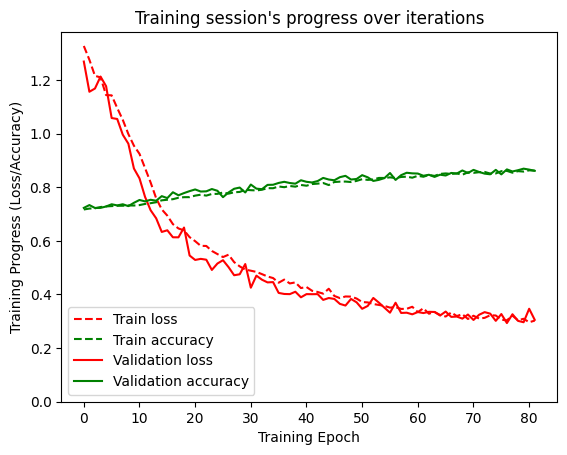

In [22]:
plt.plot(np.array(history.history['loss']), "r--", label = "Train loss")
plt.plot(np.array(history.history['accuracy']), "g--", label = "Train accuracy")
plt.plot(np.array(history.history['val_loss']), "r-", label = "Validation loss")
plt.plot(np.array(history.history['val_accuracy']), "g-", label = "Validation accuracy")
plt.title("Training session's progress over iterations")
plt.legend(loc='lower left')
plt.ylabel('Training Progress (Loss/Accuracy)')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.show()

157/157 [==============================] - 9s 52ms/step


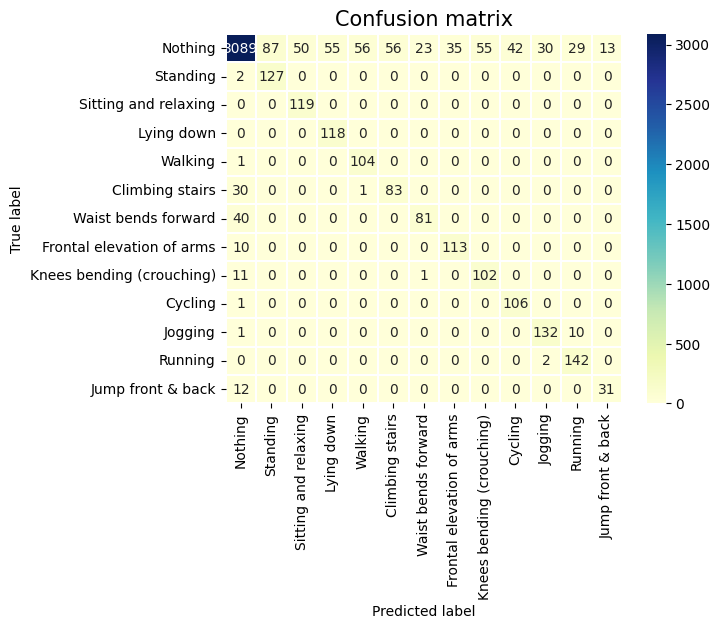

In [23]:
# Confusion Matrix
predictions = model.predict(X_test)
class_labels = [
    'Nothing','Standing', 'Sitting and relaxing', 'Lying down',
    'Walking', 'Climbing stairs', 'Waist bends forward',
    'Frontal elevation of arms', 'Knees bending (crouching)',
    'Cycling', 'Jogging', 'Running', 'Jump front & back']
max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
conf_matrix = confusion_matrix(max_test, max_predictions)
sns.heatmap(conf_matrix, xticklabels = class_labels,
            yticklabels = class_labels, annot = True, linewidths = 0.1,
            fmt='d', cmap = 'YlGnBu')
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [24]:
score = model.evaluate(X_test, y_test)
print("Accuracy:", score[1])
print("Loss:", score[0])

157/157 [==============================] - 9s 52ms/step - loss: 0.3046 - accuracy: 0.8694
Accuracy: 0.8694000244140625
Loss: 0.30464375019073486


# Remove "no activity"

In [25]:
# filter out 'activity0'
df= pd.read_csv('mhealth.csv')
data = df[df['Activity'] != 0]

## Data visualization

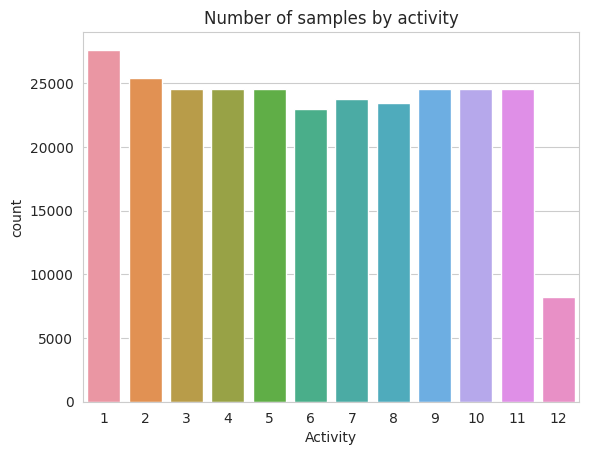

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x = 'Activity', data = data)
plt.title('Number of samples by activity')
plt.show()

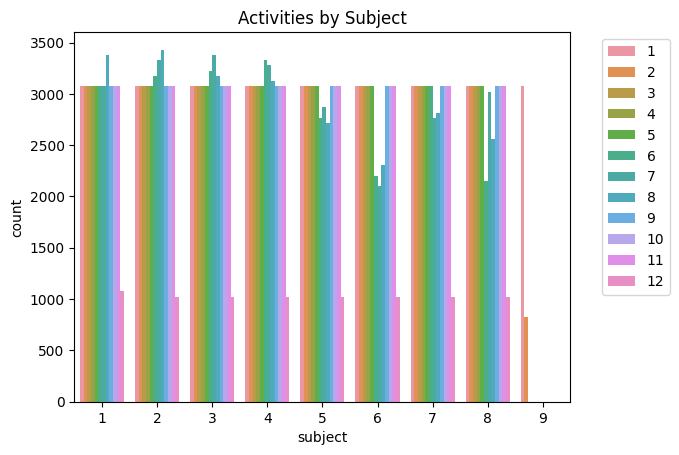

In [29]:
# Removing the "subject" part from each value in the subject column
def extract_number(string):
    return string.replace("subject", "")

data['subject'] = data['subject'].apply(extract_number)

sns.countplot(x = 'subject',  hue = 'Activity', data = data)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Activities by Subject')
plt.show()

## Data Preprocessing

In [30]:
# ================ Step1: Normalization =====================#
# Fit the scaler to the data and transform it
data[sensor_columns] = scaler.fit_transform(data[sensor_columns])

# Check the first few rows to confirm normalization
data.head()

# ============= Step2: Segmentation and Reshape ==============#
# Define window and step sizes
window_size = 64
step_size = 10 # no overlap
segments, labels = create_segments(data, window_size, step_size)

In [31]:
print(segments.shape)
print(labels.shape)

(27899, 64, 12)
(27899, 12)


## Build and Compile the 2nd LSTM

In [32]:
X_train, X_test, y_train, y_test = train_test_split(segments, labels,
                                                    test_size = 0.2,
                                                    random_state = seed)
from imblearn.over_sampling import SMOTE
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder


# Convert labels from one-hot encoding to single integers for SMOTE
encoder = LabelEncoder()
y_train_integers = encoder.fit_transform([np.argmax(y, axis=None, out=None) for y in y_train])

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train.reshape(X_train.shape[0], -1), y_train_integers)

# Reshape X_train back to 3D shape for LSTM and convert y_train back to one-hot encoding
X_train_smote = X_train_smote.reshape(X_train_smote.shape[0], X_train.shape[1], X_train.shape[2])
y_train_smote = to_categorical(y_train_smote)

model2 = Sequential()
# RNN layer
model2.add(LSTM(units = 128, input_shape = (X_train_smote.shape[1], X_train_smote.shape[2])))
# Dropout layer
model2.add(Dropout(0.5))
# Dense layer with ReLu
model2.add(Dense(units = 64, activation='relu'))
# Softmax layer
model2.add(Dense(y_train_smote.shape[1], activation = 'softmax'))
# Compile model
model2.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 128)               72192     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 12)                780       
                                                                 
Total params: 81228 (317.30 KB)
Trainable params: 81228 (317.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
history2 = model2.fit(X_train_smote, y_train_smote, epochs=n_epochs,
                     validation_split=0.20,
                     batch_size=batch_size, verbose=1,
                     callbacks=[early_stopping])

Epoch 1/100
664/664 [==============================] - 70s 97ms/step - loss: 1.6897 - accuracy: 0.3815 - val_loss: 1.6477 - val_accuracy: 0.4869
Epoch 2/100
664/664 [==============================] - 63s 95ms/step - loss: 0.9032 - accuracy: 0.6672 - val_loss: 1.0274 - val_accuracy: 0.5788
Epoch 3/100
664/664 [==============================] - 68s 103ms/step - loss: 0.6343 - accuracy: 0.7715 - val_loss: 0.6637 - val_accuracy: 0.7308
Epoch 4/100
664/664 [==============================] - 62s 94ms/step - loss: 0.4912 - accuracy: 0.8303 - val_loss: 0.4452 - val_accuracy: 0.8150
Epoch 5/100
664/664 [==============================] - 63s 95ms/step - loss: 0.3982 - accuracy: 0.8638 - val_loss: 0.3404 - val_accuracy: 0.8698
Epoch 6/100
664/664 [==============================] - 62s 94ms/step - loss: 0.3260 - accuracy: 0.8914 - val_loss: 0.1993 - val_accuracy: 0.9341
Epoch 7/100
664/664 [==============================] - 69s 103ms/step - loss: 0.2634 - accuracy: 0.9137 - val_loss: 0.1634 - val_

### Model Evaluation

In [37]:
# Evaluate the model
test_loss2, test_accuracy2 = model2.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss2}, Test Accuracy: {test_accuracy2}")

175/175 [==============================] - 8s 43ms/step - loss: 0.0433 - accuracy: 0.9860
Test Loss: 0.04326887056231499, Test Accuracy: 0.9860215187072754


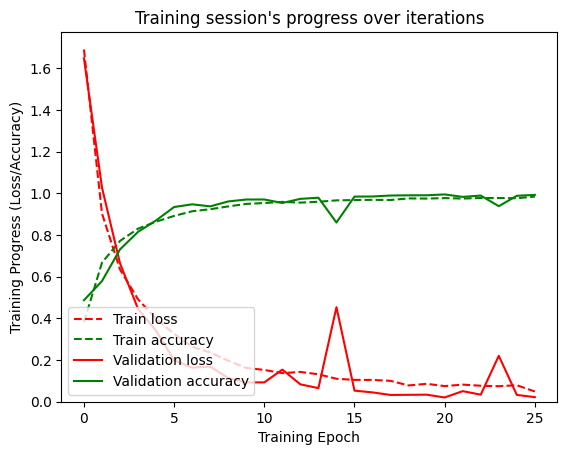

In [35]:
plt.plot(np.array(history2.history['loss']), "r--", label = "Train loss")
plt.plot(np.array(history2.history['accuracy']), "g--", label = "Train accuracy")
plt.plot(np.array(history2.history['val_loss']), "r-", label = "Validation loss")
plt.plot(np.array(history2.history['val_accuracy']), "g-", label = "Validation accuracy")
plt.title("Training session's progress over iterations")
plt.legend(loc='lower left')
plt.ylabel('Training Progress (Loss/Accuracy)')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.show()

175/175 [==============================] - 7s 39ms/step


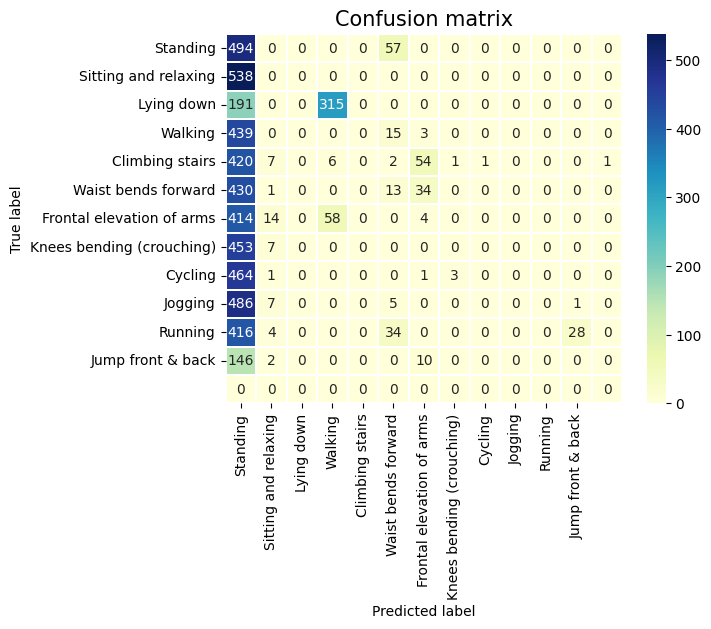

In [36]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
predictions = model.predict(X_test)
class_labels = [
    'Standing', 'Sitting and relaxing', 'Lying down',
    'Walking', 'Climbing stairs', 'Waist bends forward',
    'Frontal elevation of arms', 'Knees bending (crouching)',
    'Cycling', 'Jogging', 'Running', 'Jump front & back']
max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)

# Compute the confusion matrix and store it in a variable with a different name
conf_matrix2 = confusion_matrix(max_test, max_predictions)

# Plot the confusion matrix
sns.heatmap(conf_matrix2, xticklabels=class_labels,
            yticklabels=class_labels, annot=True, linewidths=0.1,
            fmt='d', cmap='YlGnBu')
plt.title("Confusion matrix", fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Reference

Chauhan, T. (2022, July 9). Human activity recognition using LSTM-CNN. Medium. https://medium.com/@tanmaychauhan111/human-activity-recognition-using-lstm-cnn-8ccb1a42cb81